In [26]:
from keras.models import load_model
from PIL import Image
from numpy import linalg
from numpy import expand_dims
from numpy import asarray
import pickle
import cv2
import time

In [15]:
MyFaceNet = load_model("D:\\College\\Semester 8\\Coding\\Models\\FaceNet\\facenet_keras.h5")

In [2]:
HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [24]:
file = open("../Data/signature.pkl", "rb")
signatureBase = pickle.load(file)
file.close()

1/1 [==============================] - 0s 33ms/step


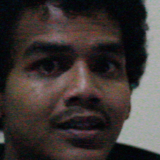

In [62]:
cap = cv2.VideoCapture(0)
while 1:
    _, imgVideo = cap.read()
    FaceDetect = HaarCascade.detectMultiScale(imgVideo, 1.3, 10)
    
    for (x1, y1, width, height) in FaceDetect:
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        
        img = cv2.cvtColor(imgVideo, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)
        img_array = asarray(img)
        
        face = img_array[y1:y2, x1:x2]
        
        face = Image.fromarray(face)
        face = face.resize((160,160))
        wajah = face
        face = asarray(face)
        
        face = face.astype('float32')
        mean, std = face.mean(), face.std()
        face = (face - mean) / std
        
        face = expand_dims(face, axis=0)
        cv2.rectangle(imgVideo, (x1,y1), (x2,y2), (0,255,0), 2)
    cv2.imshow('Face Recognition', imgVideo)
    break
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()
cap.release()
signature = MyFaceNet.predict(face)
wajah

In [ ]:
# face = cv2.imread("Muhammad Yasir_front_4.jpg")
# face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
# face = Image.fromarray(face)
# face = face.resize((160,160))
# face = asarray(face)
# face = face.astype('float32')
# mean, std = face.mean(), face.std()
# face = (face - mean) / std

# face = expand_dims(face, axis=0)
# signature = MyFaceNet.predict(face)

In [63]:
nobp ='18101152630069'
status = 0

for key, value in signatureBase.items():
    if key == nobp:
        status = 1
        
        distance = linalg.norm(value - signature)
        # print(distance)
        if (distance > 7):
            identity = "Unknown"
        else:
            identity = key
        print(f"Label: {identity} dengan distance: {distance}")
        
if status != 1:
    print("signature tidak ditemukan")

Label: 18101152630069 dengan distance: 6.993699073791504


In [64]:
# define the countdown func.
def countdown(t):
    while t:
        mins, secs = divmod(t, 60)
        timer = '{:02d}:{:02d}'.format(mins, secs)
        print(timer, end="\r")
        time.sleep(1)
        t -= 1
    print('Fire in the hole!!')

# input time in seconds
t = input("Enter the time in seconds: ")

# function call
countdown(int(t))

Fire in the hole!!
